In [109]:
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()

In [110]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [111]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [112]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [113]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [114]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [115]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [116]:
df['flower_name']=df.target.apply(lambda x:iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [117]:
import matplotlib.pyplot as plt

In [118]:
df0=df[:50]
df1=df[50:100]
df2=df[100:]

In [119]:
import matplotlib.pyplot as plt
%matplotlib inline

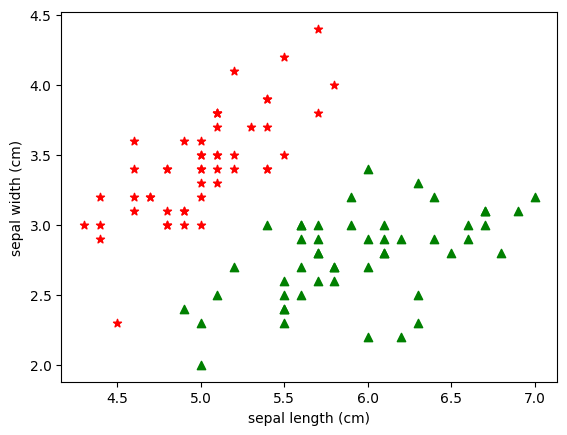

In [120]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='red',marker='*')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='green',marker='^')

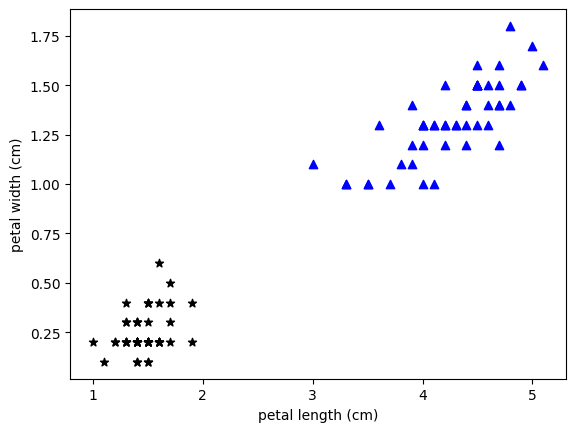

In [121]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='black',marker='*')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue',marker='^')

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
print(df.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'flower_name'],
      dtype='object')


In [124]:
x=df.drop(['target','flower_name'], axis='columns')
y=df.target

In [125]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [126]:
len(x_train)

120

In [127]:
len(x_test)

30

In [128]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [129]:
knn.score(x_test,y_test)

1.0

In [130]:
from sklearn.metrics import confusion_matrix
y_pred=knn.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[13,  0,  0],
       [ 0, 11,  0],
       [ 0,  0,  6]], dtype=int64)

Text(50.722222222222214, 0.5, 'actual')

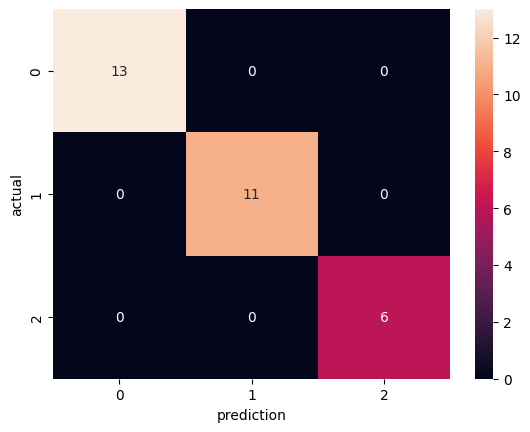

In [131]:
import seaborn as sns
plt.Figure(figsize=(7,5))
sns.heatmap(cm,annot=True)
plt.xlabel('prediction')
plt.ylabel('actual')

In [132]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

